In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import re
import PIL.Image
import numpy as np

In [2]:
# allows all images to be displayed at once (else only displays the last call to plt.imshow())
# https://stackoverflow.com/a/41210974
def displayImage(image, caption = None, colour = None) -> None:
    plt.figure()
    if(colour != None):
        plt.imshow(image, cmap=colour)
    else:
        plt.imshow(image)
        
    if(caption != None):
        # display caption below picture (https://stackoverflow.com/a/51486361)
        plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)

In [3]:
# https://stackoverflow.com/a/44659589
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

# Extracting 'L' of HSL and normalizing it
* https://stackoverflow.com/a/59769633

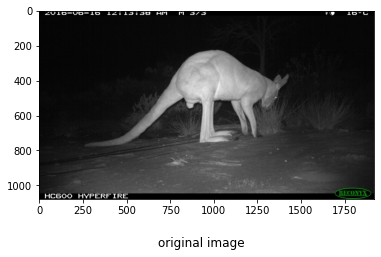

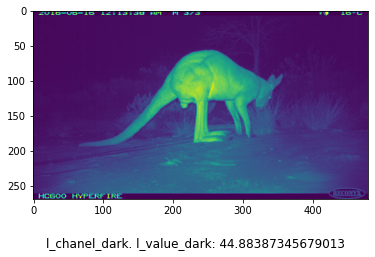

In [4]:
im_dark = cv2.imread('../data/20160724_July/BB01/IMG_0012.JPG')
displayImage(cv2.cvtColor(im_dark, cv2.COLOR_BGR2RGB), 'original image')
im_dark = image_resize(im_dark, height = 270)
# im_dark = im_dark.reshape()
# im_bright = cv2.imread('data/20160829_August/BB01/2016-08-21 16-43-21 M 3_3.JPG')
# displayImage(cv2.cvtColor(im_bright, cv2.COLOR_BGR2RGB))

# convert image to HSL and analyse 'lightness' of image
hsl_dark = cv2.cvtColor(im_dark, cv2.COLOR_BGR2HLS)
l_chanel_dark = hsl_dark[:,:,1]
l_value_dark = cv2.mean(l_chanel_dark)[0]
displayImage(l_chanel_dark, 'l_chanel_dark. l_value_dark: {}'.format(l_value_dark))

# add an enhanced lightness channel to the original image
# new_l_channel = l_chanel_dark + 10
# print('new_l_channel: {}'.format(new_l_channel))
# new_im = cv2.add(im_dark, new_l_channel)
# displayImage(new_im, 'addition of enhanced lightness channel to original dark_im')

# hsl_bright = cv2.cvtColor(im_bright, cv2.COLOR_BGR2HLS)
# l_chanel_bright = hsl_bright[:,:,1]
# displayImage(l_chanel_bright, 'l_chanel_bright')
# l_value_bright = cv2.mean(l_chanel_bright)[0]
# print('l_value_bright: {}'.format(l_value_bright))

## Output a bunch of images and their lightness value of the HSL image

In [5]:
# folders = ['BB01', 'BB02', 'BB03', 'BB04', 'BB05', 'BB06', 'BB07', 'BB08', 'BB09', 'BB10']

# folders = ['BB02']
folders = []

image_list = []
for folder in folders:
    all_image_filenames = next(os.walk('../data/20160724_July/{}'.format(folder)),
                             (None, None, []))[2]  # [] if no file, 'BB04', 'BB05', 'BB06', 'BB07', 'BB08', 'BB09', 'BB10'
    imgRegExp = re.compile(r'.*[.](JPG)$')
    all_image_filenames = [i for i in all_image_filenames if imgRegExp.match(i)]
    all_image_filenames.sort()
    
    for fn in all_image_filenames:
        im = cv2.imread('../data/20160724_July/{}/{}'.format(folder, fn))
        image_list.append(im)
        
        im_hsl = cv2.cvtColor(im, cv2.COLOR_BGR2HLS)
        l_chanel = im_hsl[:,:,1]
        l_value = cv2.mean(l_chanel)[0]
        
        im_cap = 'data/20160724_July/{}/{} has brightness: {}'.format(folder, fn, l_value)
        im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        displayImage(im_rgb, im_cap)
        
# displayImage(image_list[0])
# displayImage(image_list[5])
# displayImage(image_list[18])
# displayImage(image_list[100])
    

# Histogram equalization

## On HSL lightness channel

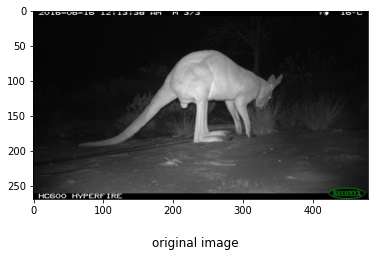

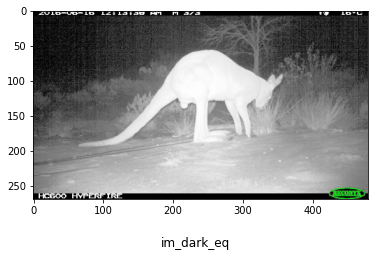

In [6]:
im_dark_hsv = cv2.cvtColor(im_dark, cv2.COLOR_BGR2HSV)
im_dark_hsv[:,:,2] = cv2.equalizeHist(im_dark_hsv[:,:,2])
im_dark_eq = cv2.cvtColor(im_dark_hsv, cv2.COLOR_HSV2RGB)
displayImage(cv2.cvtColor(im_dark, cv2.COLOR_BGR2RGB), 'original image')
displayImage(im_dark_eq, 'im_dark_eq')

# Simple linear transform
* https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html
* modifies alpha (contrast) and beta (brightness)

## Try different beta (brightness) values

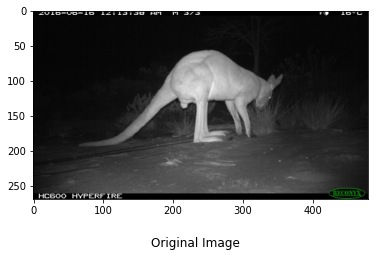

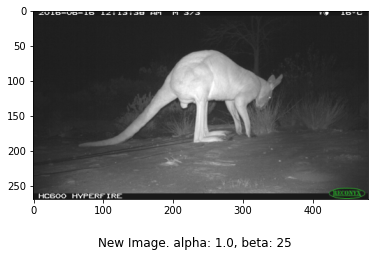

In [7]:
new_image = np.zeros(im_dark.shape, im_dark.dtype)
alpha = 1.0  # base value is 1.0 - can be 1.0 - 3.0
beta = 25  # base value is 0 - can be 0 - 100

for y in range(im_dark.shape[0]):
    for x in range(im_dark.shape[1]):
        for c in range(im_dark.shape[2]):
            new_image[y,x,c] = np.clip(alpha*im_dark[y,x,c] + beta, 0, 255)
displayImage(im_dark, 'Original Image')
displayImage(new_image, 'New Image. alpha: {}, beta: {}'.format(alpha, beta))

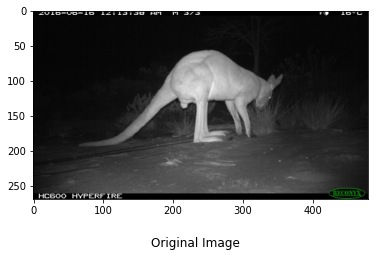

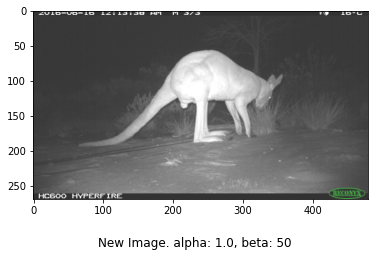

In [8]:
new_image = np.zeros(im_dark.shape, im_dark.dtype)
alpha = 1.0  # base value is 1.0 - can be 1.0 - 3.0
beta = 50  # base value is 0 - can be 0 - 100

for y in range(im_dark.shape[0]):
    for x in range(im_dark.shape[1]):
        for c in range(im_dark.shape[2]):
            new_image[y,x,c] = np.clip(alpha*im_dark[y,x,c] + beta, 0, 255)
displayImage(im_dark, 'Original Image')
displayImage(new_image, 'New Image. alpha: {}, beta: {}'.format(alpha, beta))

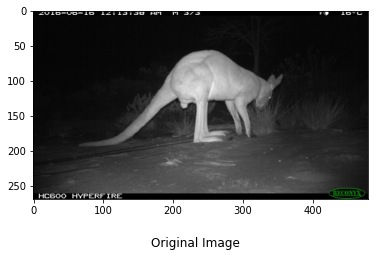

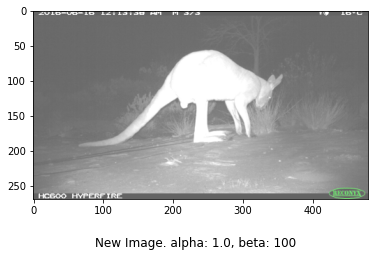

In [9]:
new_image = np.zeros(im_dark.shape, im_dark.dtype)
alpha = 1.0  # base value is 1.0 - can be 1.0 - 3.0
beta = 100  # base value is 0 - can be 0 - 100

for y in range(im_dark.shape[0]):
    for x in range(im_dark.shape[1]):
        for c in range(im_dark.shape[2]):
            new_image[y,x,c] = np.clip(alpha*im_dark[y,x,c] + beta, 0, 255)
displayImage(im_dark, 'Original Image')
displayImage(new_image, 'New Image. alpha: {}, beta: {}'.format(alpha, beta))

## Try different alpha (contrast) values

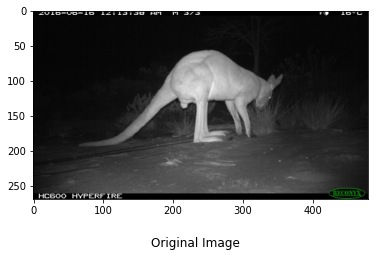

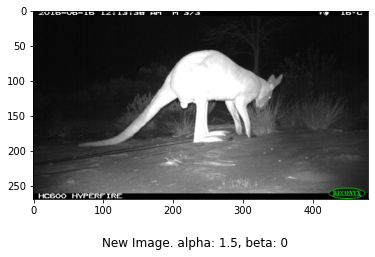

In [10]:
new_image = np.zeros(im_dark.shape, im_dark.dtype)
alpha = 1.5  # base value is 1.0 - can be 1.0 - 3.0
beta = 0  # base value is 0 - can be 0 - 100

for y in range(im_dark.shape[0]):
    for x in range(im_dark.shape[1]):
        for c in range(im_dark.shape[2]):
            new_image[y,x,c] = np.clip(alpha*im_dark[y,x,c] + beta, 0, 255)
displayImage(im_dark, 'Original Image')
displayImage(new_image, 'New Image. alpha: {}, beta: {}'.format(alpha, beta))

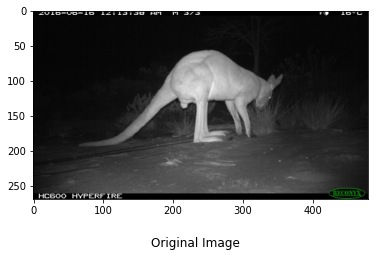

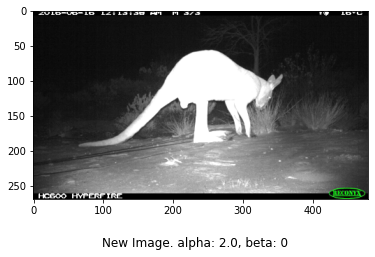

In [11]:
new_image = np.zeros(im_dark.shape, im_dark.dtype)
alpha = 2.0  # base value is 1.0 - can be 1.0 - 3.0
beta = 0  # base value is 0 - can be 0 - 100

for y in range(im_dark.shape[0]):
    for x in range(im_dark.shape[1]):
        for c in range(im_dark.shape[2]):
            new_image[y,x,c] = np.clip(alpha*im_dark[y,x,c] + beta, 0, 255)
displayImage(im_dark, 'Original Image')
displayImage(new_image, 'New Image. alpha: {}, beta: {}'.format(alpha, beta))

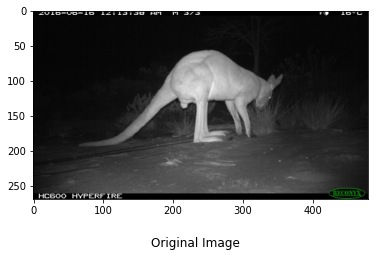

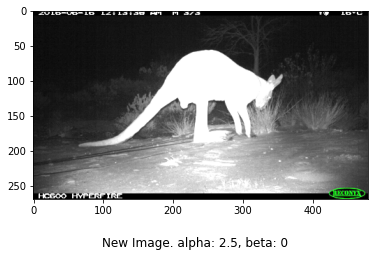

In [12]:
new_image = np.zeros(im_dark.shape, im_dark.dtype)
alpha = 2.5  # base value is 1.0 - can be 1.0 - 3.0
beta = 0  # base value is 0 - can be 0 - 100

for y in range(im_dark.shape[0]):
    for x in range(im_dark.shape[1]):
        for c in range(im_dark.shape[2]):
            new_image[y,x,c] = np.clip(alpha*im_dark[y,x,c] + beta, 0, 255)
displayImage(im_dark, 'Original Image')
displayImage(new_image, 'New Image. alpha: {}, beta: {}'.format(alpha, beta))

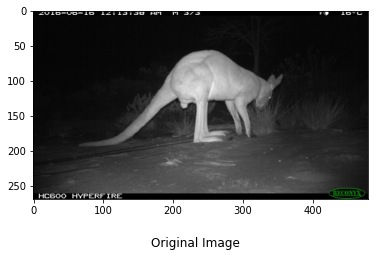

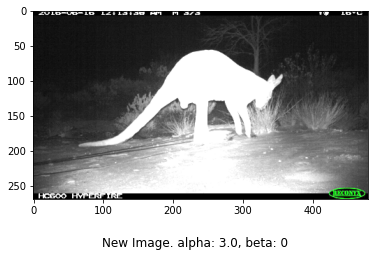

In [13]:
new_image = np.zeros(im_dark.shape, im_dark.dtype)
alpha = 3.0  # base value is 1.0 - can be 1.0 - 3.0
beta = 0  # base value is 0 - can be 0 - 100

for y in range(im_dark.shape[0]):
    for x in range(im_dark.shape[1]):
        for c in range(im_dark.shape[2]):
            new_image[y,x,c] = np.clip(alpha*im_dark[y,x,c] + beta, 0, 255)
displayImage(im_dark, 'Original Image')
displayImage(new_image, 'New Image. alpha: {}, beta: {}'.format(alpha, beta))

## Combination of contrast and brightness

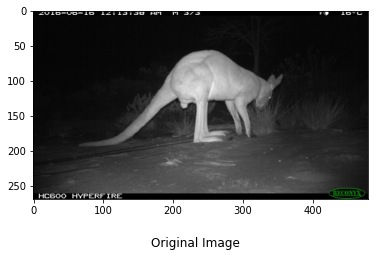

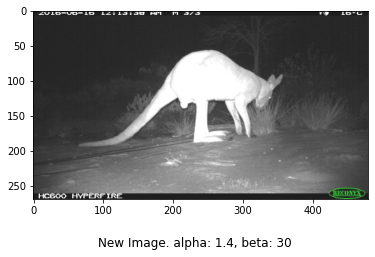

In [14]:
new_image = np.zeros(im_dark.shape, im_dark.dtype)
alpha = 1.4  # base value is 1.0 - can be 1.0 - 3.0
beta = 30  # base value is 0 - can be 0 - 100

for y in range(im_dark.shape[0]):
    for x in range(im_dark.shape[1]):
        for c in range(im_dark.shape[2]):
            new_image[y,x,c] = np.clip(alpha*im_dark[y,x,c] + beta, 0, 255)
displayImage(im_dark, 'Original Image')
displayImage(new_image, 'New Image. alpha: {}, beta: {}'.format(alpha, beta))